In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler 

In [3]:
data = pd.read_csv("/content/sample_data/mnist_train_small.csv")
data.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.isnull().sum().any()

False

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


In [13]:
# Dividing the featurs and target

X = data.iloc[:, 1:].values
Y = data.iloc[:, 0]. values

X.shape, Y.shape

((19999, 784), (19999,))

In [21]:
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

X.shape

(19999, 784)

In [35]:
def PlotImage(X, Y):
    idx = np.random.choice(X.shape[0])
    label = Y[idx]
    print("Target : ", label)
    x = X[idx, :]
    x = x.reshape(28,28)
    plt.imshow(x)

Target :  2


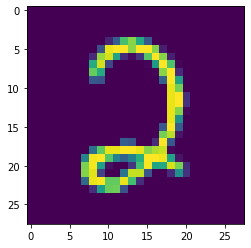

In [36]:
PlotImage(X,Y)

In [41]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split (X, Y, test_size = 0.2, shuffle = True, random_state = 4) 

print(" Training Data shape : ",Xtrain.shape, Ytrain.shape)
print(" Testing Data shape : ", Xtest.shape, Ytest.shape)

 Training Data shape :  (15999, 784) (15999,)
 Testing Data shape :  (4000, 784) (4000,)


In [45]:
from sklearn. neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [46]:
predictions = model.predict(Xtest)

In [47]:
model.score(Xtest, Ytest)

0.96025

In [48]:
for k in [3,5,7,9]:
    print(" K : ", k)
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(Xtrain, Ytrain)
    print(" Accuracy : ", model.score(Xtest, Ytest))

 K :  3
 Accuracy :  0.96025
 K :  5
 Accuracy :  0.95725
 K :  7
 Accuracy :  0.95475
 K :  9
 Accuracy :  0.952
